# 主成分分析をirisデータセットに適用する

今回使用するirisデータセットは簡単のためsckit-learnライブラリから導入した

In [29]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import matplotlib.pyplot as plt

In [30]:
# irisデータセットの読み込み
iris = datasets.load_iris()
x = iris.data
y = iris.target 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=0)  
print(iris.keys())
print(iris['target_names'])
print(iris['feature_names'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [31]:
pd.DataFrame(iris.data, columns=iris.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### データを標準化する
$$
z_i=\frac{x_i-\mu}{\sigma}
$$
ここで$\mu$は平均、$\sigma$は分散を表す

In [32]:
import math
# データを標準化する関数
def standardize(x):
    return (x-x.mean()) / x.std()

In [33]:
# xデータの標準化
x_train_std = standardize(x_train)
x_test_std = standardize(x_test)

In [34]:
# 固有値と固有ベクトルの計算
cov_mat = np.cov(x_train_std.T)  # 共分散行列を計算
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)  # 共分散行列から固有値と固有ベクトルを計算
print('\ncov_mat \n%s' % cov_mat)  # 共分散行列を表示
print('\nEigenvalues \n%s' % eigen_vals)  # 固有値の表示
print('\nEigenvectors \n%s' % eigen_vecs)  # 固有ベクトルの表示

array = np.array([[eigen_vals[0], 0, 0, 0],
                  [0, eigen_vals[1], 0, 0],
                  [0, 0, eigen_vals[2], 0],
                  [0, 0, 0, eigen_vals[3]]])  # 固有値からarrayを作成 
print('\narray \n%s' % array) 
print('\nEigenvectors(-1) \n%s' % np.linalg.inv(eigen_vecs))  
results = eigen_vecs.dot(array).dot(np.linalg.inv(eigen_vecs))
print('\nEigenvectors * array * Eigenvectors(-1) = \n%s' % results)


cov_mat 
[[ 0.18669321 -0.00740546  0.34249494  0.13554813]
 [-0.00740546  0.05210504 -0.0838627  -0.03117307]
 [ 0.34249494 -0.0838627   0.82092329  0.3351328 ]
 [ 0.13554813 -0.03117307  0.3351328   0.14751558]]

Eigenvalues 
[1.11365629 0.06866974 0.01910036 0.00581074]

Eigenvectors 
[[ 0.36860875 -0.64263366 -0.57523283  0.34678055]
 [-0.08057962 -0.74167427  0.58341661 -0.32101599]
 [ 0.85678051  0.16970258  0.06882    -0.48207053]
 [ 0.35151339  0.09023469  0.56920651  0.73776689]]

array 
[[1.11365629 0.         0.         0.        ]
 [0.         0.06866974 0.         0.        ]
 [0.         0.         0.01910036 0.        ]
 [0.         0.         0.         0.00581074]]

Eigenvectors(-1) 
[[ 0.36860875 -0.08057962  0.85678051  0.35151339]
 [-0.64263366 -0.74167427  0.16970258  0.09023469]
 [-0.57523283  0.58341661  0.06882     0.56920651]
 [ 0.34678055 -0.32101599 -0.48207053  0.73776689]]

Eigenvectors * array * Eigenvectors(-1) = 
[[ 0.18669321 -0.00740546  0.34249494  0

contribution rate:
 [0.922483467465038, 0.05688173320395371, 0.015821545955263264, 0.004813253375745078]
cumulative contribution rate:
 [0.92248347 0.9793652  0.99518675 1.        ]


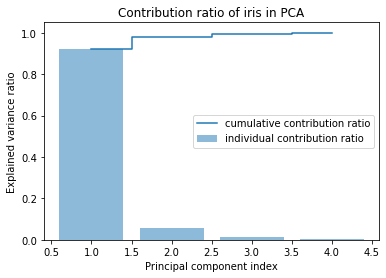

In [41]:
# 寄与率と累積寄与率
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('contribution rate:\n', var_exp)
print('cumulative contribution rate:\n', cum_var_exp)
plt.bar(range(1 ,5), var_exp, alpha=0.5, align='center', label='individual contribution ratio')
plt.step(range(1, 5), cum_var_exp, where='mid', label='cumulative contribution ratio')
plt.title('Contribution ratio of iris in PCA')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.savefig('iris_PCA_explained_variance.png')
plt.show()

In [25]:
# 射影行列wの作成
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])  # 固有値と固有ベクトルのセットを作成
               for i in range(len(eigen_vals))]  
eigen_pairs.sort(key=lambda k: k[0], reverse=True)  # ソート
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))  # 上位2つのベクトルを取得
print(w)  # 射影行列(4×2)を表示

[[ 0.36860875 -0.64263366]
 [-0.08057962 -0.74167427]
 [ 0.85678051  0.16970258]
 [ 0.35151339  0.09023469]]


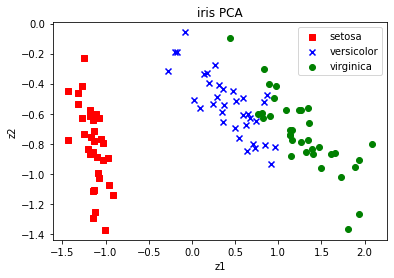

In [43]:
# データセットを射影行列wで変換
x_train_pca = x_train_std.dot(w)

colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(x_train_pca[y_train == l, 0], 
                x_train_pca[y_train == l, 1], 
                c=c, label=iris['target_names'][l], marker=m)
plt.title('iris PCA')
plt.xlabel('z1')
plt.ylabel('z2')
plt.legend(loc='upper right')
plt.savefig('iris_PCA.png')
plt.show()

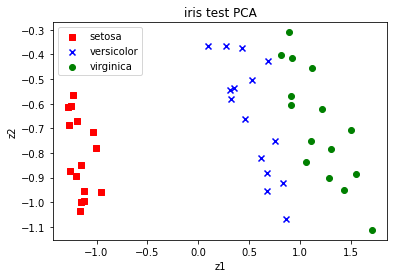

In [45]:
x_test_pca = x_test_std.dot(w)

colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_test), colors, markers):
    plt.scatter(x_test_pca[y_test == l, 0], 
                x_test_pca[y_test == l, 1], 
                c=c, label=iris['target_names'][l], marker=m)
plt.title('iris test PCA')
plt.xlabel('z1')
plt.ylabel('z2')
plt.legend(loc='upper left')
plt.savefig('iris_PCA_test.png')
plt.show()